<font size=7> Firing Rate Plots

In [1]:
from human_hip import spike_data
import numpy as np

In [2]:
sd = spike_data.read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


# Raster Code

In [4]:

import matplotlib.pyplot as plt
from braingeneers.analysis.analysis import SpikeData
from scipy.ndimage import gaussian_filter1d
import numpy as np


def plot_raster( sd, title="", opto=[], axs=None, xlim=None, ylim=None, smoothness=20, size=(16,6) ):
    num_spikes = sd.binned(bin_size=1)
    smoothed_spikes = gaussian_filter1d( num_spikes.astype(float), sigma=smoothness)
    pop_fr = smoothed_spikes * 1000 / sd.N
    bins = np.linspace(0, sd.length, num_spikes.shape[0] ) #/1000
    
    if axs is None:
        fig, axs = plt.subplots(1, 1, figsize=size )
    axs.set_title(title, fontsize=22)

    y = 0
    for vv in sd.train:
        axs.scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
        y += 1
    axs.set_xlabel("Time (s)", fontsize=16)
    axs.set_ylabel("Neural Unit", fontsize=16)
    axs.xaxis.set_tick_params(labelsize=16)
    axs.yaxis.set_tick_params(labelsize=16)
    for row in opto:
        axs.axvspan(row[0], row[1], color='#00FF00', alpha=0.15) 

    axs1 = axs.twinx()
    axs1.yaxis.set_label_position("right") 
    axs1.spines['right'].set_color('r')
    axs1.spines['right'].set_linewidth(3)
    axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
    axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
    axs1.set_xlabel("Time (ms)", fontsize=16)
    axs1.yaxis.set_tick_params(labelsize=16)
    axs1.set_xlim(xlim)
    axs1.set_ylim(ylim)
    #axs1.set_ylim(ylim)

    axs1.spines['top'].set_visible(False)
    axs1.get_xaxis().set_visible(False)
    axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                    bottom=False, labelbottom=True)
    axs1.tick_params(axis='y', colors='r')

    return axs, axs1





# <font color="brown"> New Plots

(<Axes: title={'center': 'Neural Activity During Seizure Event'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

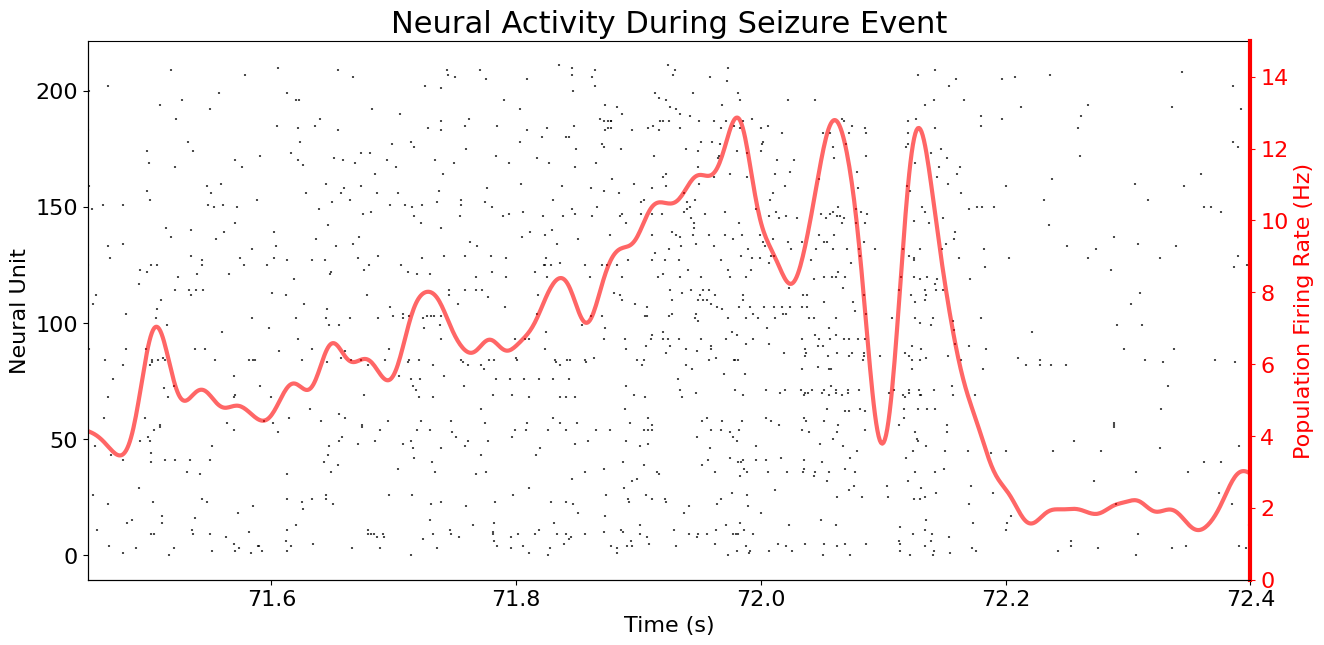

In [9]:
plot_raster( sd, smoothness=10 , xlim=(71.45, 72.4), ylim=(0,15),   size=(15, 7), title="Neural Activity During Seizure Event" ) 


(<Axes: title={'center': 'Neural Activity During Initiation Phase'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

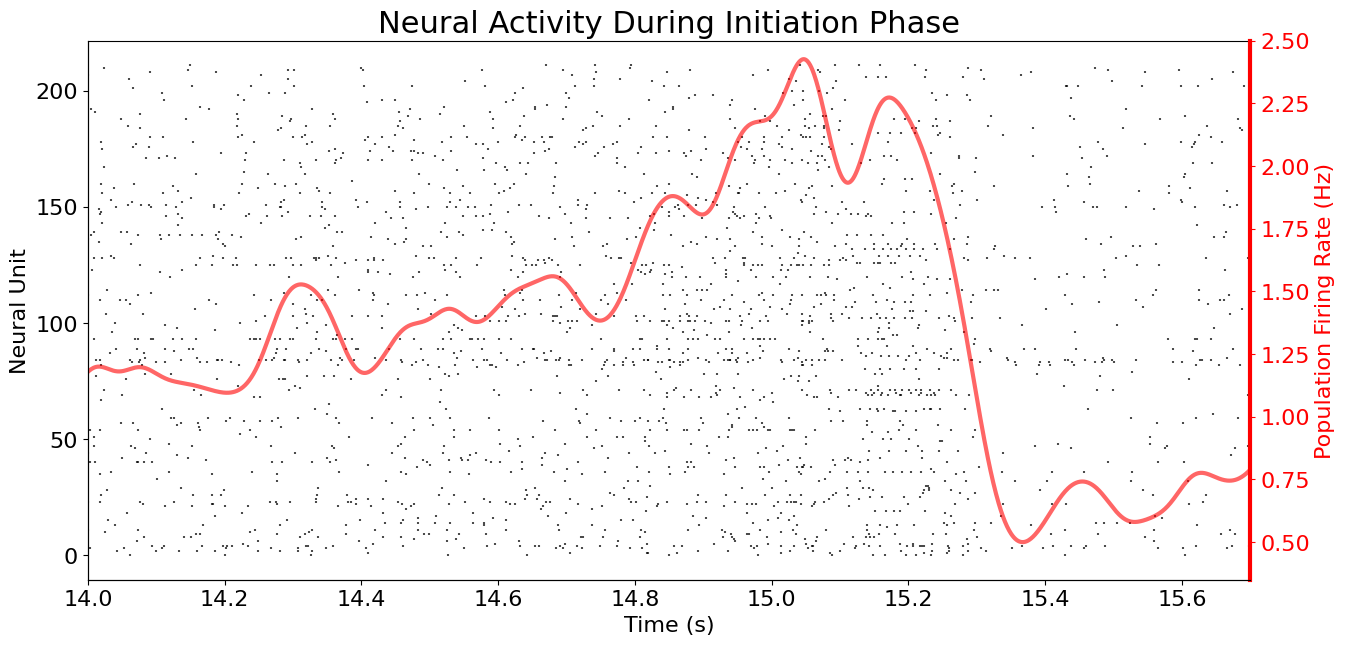

In [12]:
spike_data.plot_raster( sd, size=(15,7), xlim=(14, 15.7), smoothness=28, ylim=(0.35,2.5), title="Neural Activity During Initiation Phase" )


## <font color="brown"> Find Second Raster

(<Axes: title={'center': 'Neural Activity During Seizure Event'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

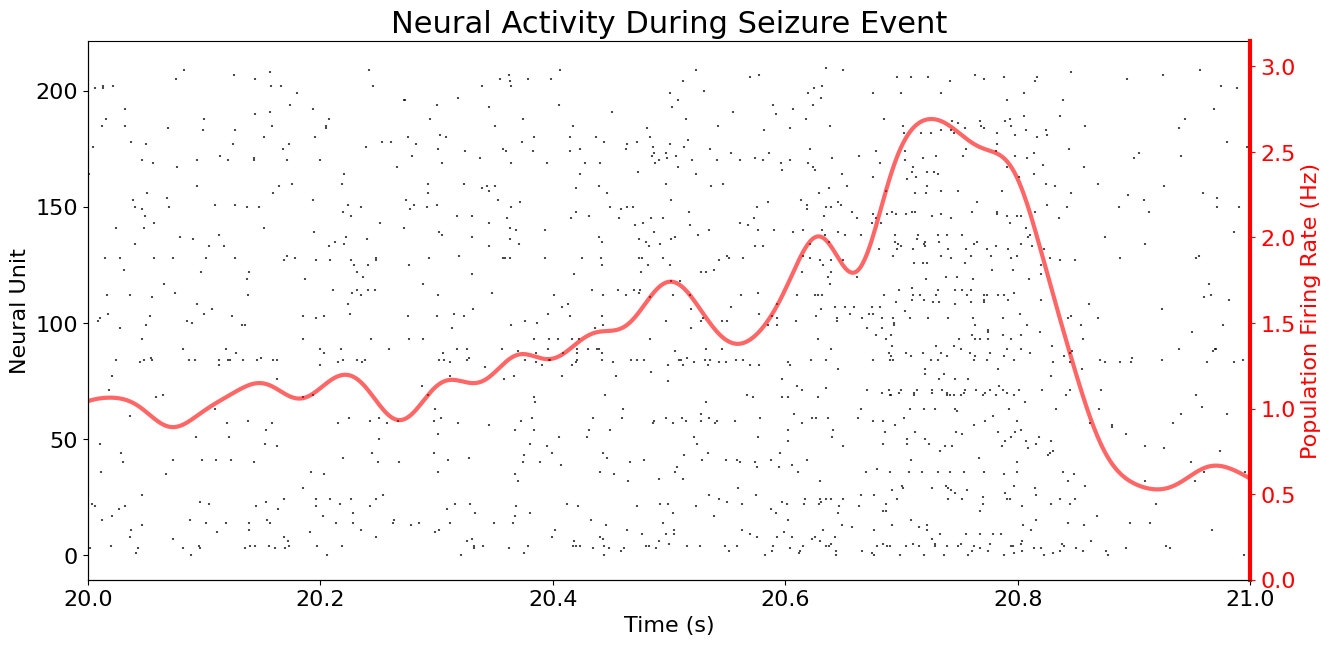

In [5]:
plot_raster( sd,  xlim=(20, 21) , size=(15, 7), ylim=(0,3.15) , title="Neural Activity During Seizure Event" )


(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

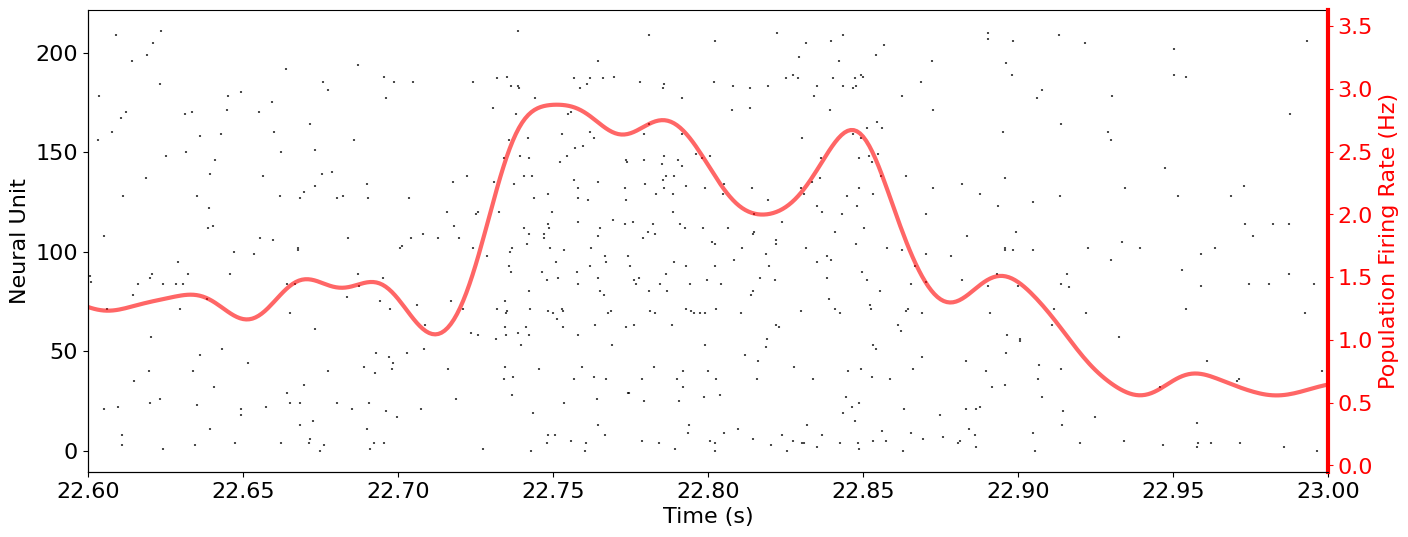

In [17]:
plot_raster( sd, smoothness=9, xlim=(22.6, 23) )

(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

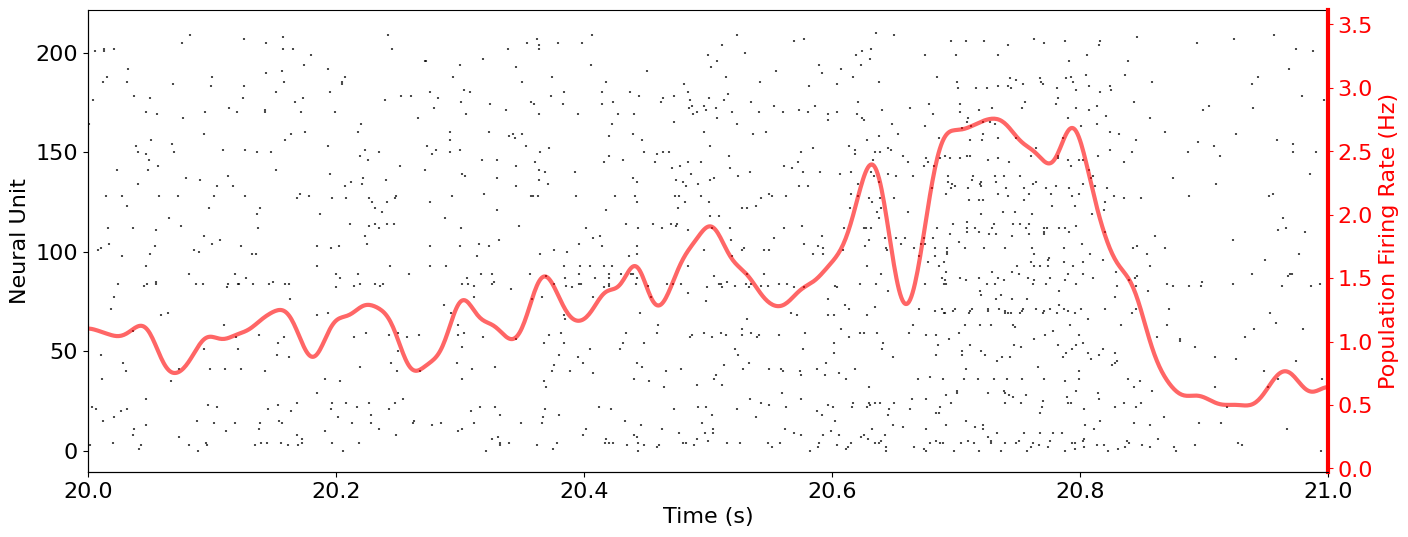

In [11]:
plot_raster( sd, smoothness=10, xlim=(20, 21) )

(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

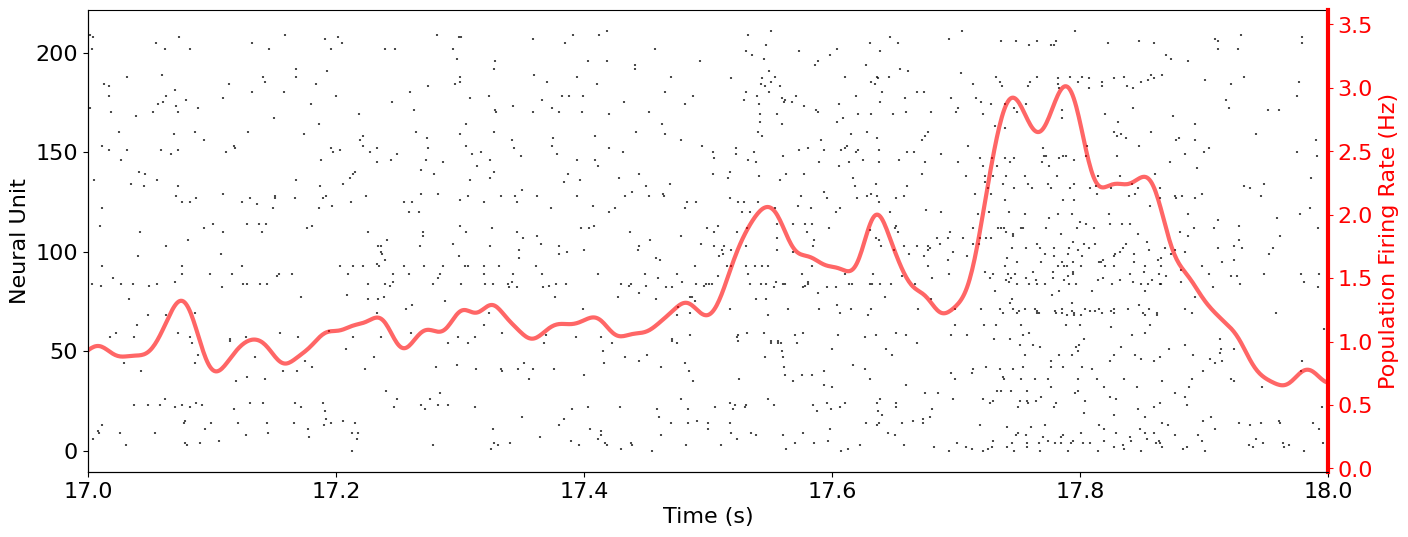

In [12]:
plot_raster( sd, smoothness=10, xlim=(17, 18) )

(<Axes: xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

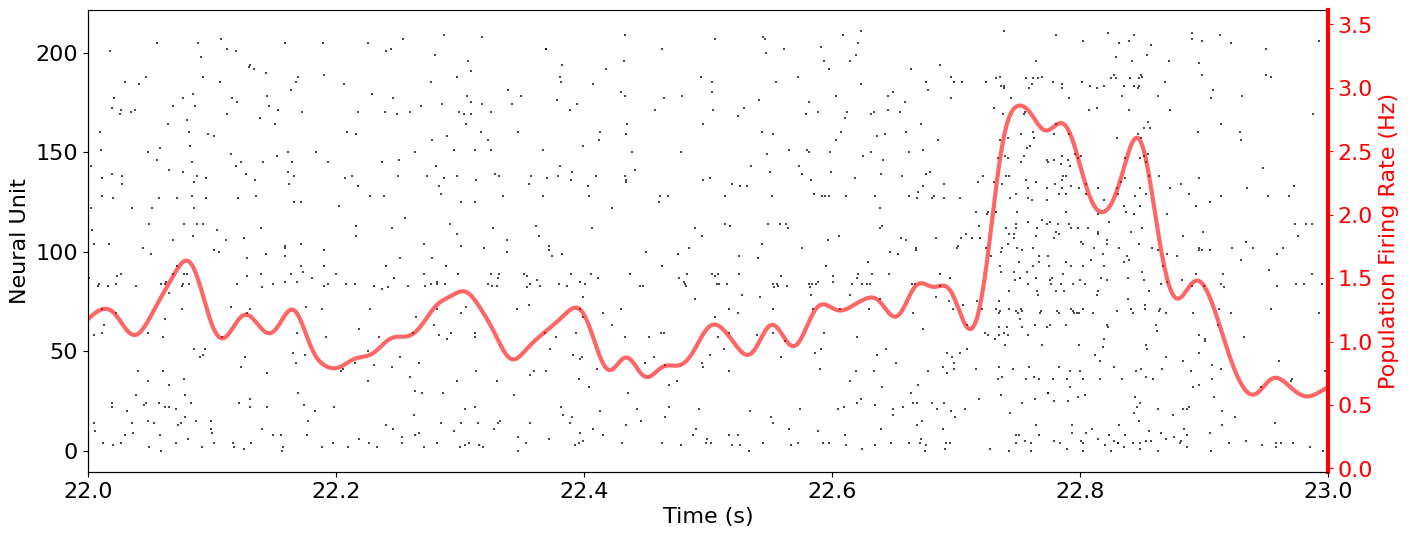

In [13]:
plot_raster( sd, smoothness=10, xlim=(22, 23) )

# Seizure Plot

NameError: name 'plot_raster' is not defined

# Initiation Plot

(<Axes: title={'center': 'Neural Activity During Initiation Phase'}, xlabel='Time (s)', ylabel='Neural Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

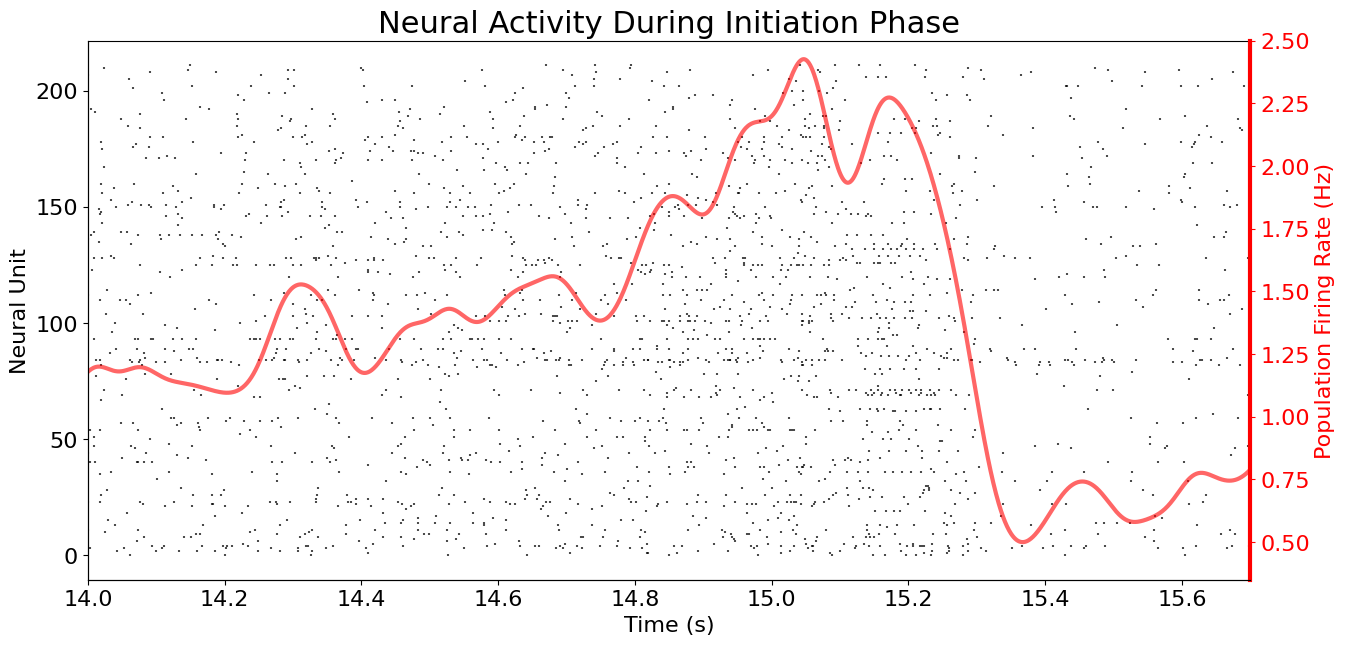

In [5]:
spike_data.plot_raster( sd, size=(15,7), xlim=(14, 15.7), smoothness=28, ylim=(0.35,2.5), title="Neural Activity During Initiation Phase" )

In [6]:
#plot_raster( sd, smoothness=19 , xlim=(14.5, 15.5) , size=(15, 7), ylim=(0,3), title="Neural Activity During Initiation Phase" )

# <font color="green"> Burst Idea

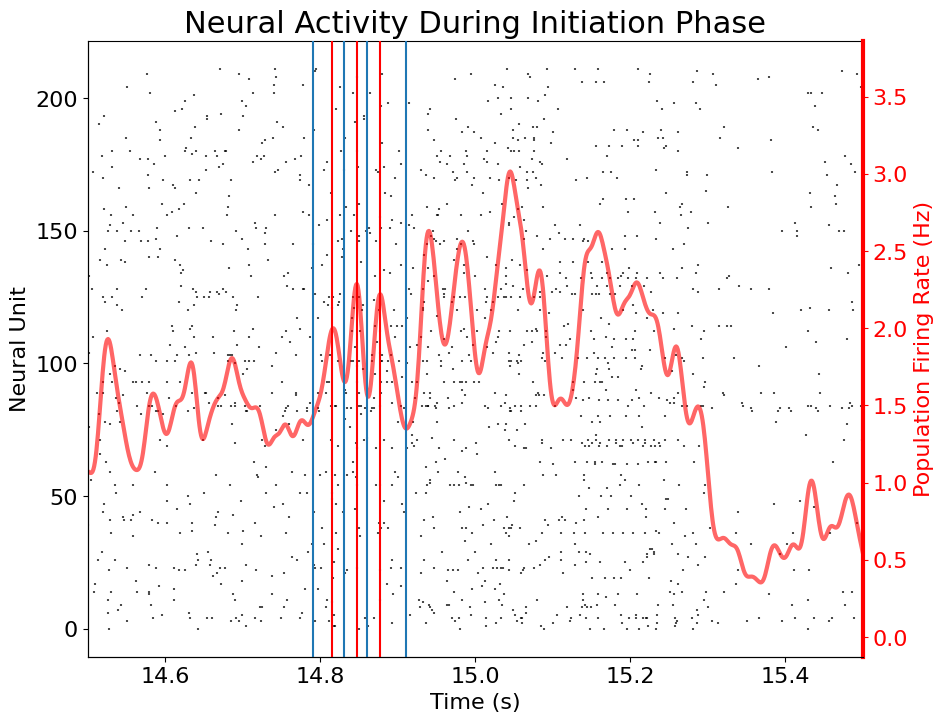

In [33]:
plot_raster( sd, smoothness=7 , xlim=(14.5, 15.5) , size=(10, 8), title="Neural Activity During Initiation Phase" )
#plt.axvline(x=14.555)
#plt.axvline(x=14.629,c="red")
#plt.axvline(x=14.685)
#plt.axvline(x=14.7175,c="red")
#plt.axvline(x=14.75)
plt.axvline(x=14.79)
plt.axvline(x=14.815, c="red")
plt.axvline(x=14.83)
plt.axvline(x=14.847,c="red")
plt.axvline(x=14.86)
plt.axvline(x=14.877,c="red")
plt.axvline(x=14.91)


In [55]:
def calculate_mean_firing_rates(spike_data):
    mean_firing_rates = []
    for neuron_spikes in spike_data.train:
        num_spikes = len(neuron_spikes)
        time_duration = spike_data.length / 1000  # Assuming spike times are in milliseconds
        firing_rate = num_spikes / time_duration
        mean_firing_rates.append(firing_rate)

    return np.array(mean_firing_rates)

def firing_plotter(sd):
    firing_rates = calculate_mean_firing_rates(sd)

    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.figure(figsize=(8, 6))
    plt.scatter(neuron_x, neuron_y, s=firing_rates*20 + firing_rates**1.5, alpha=0.3, c='r')
    plt.show()

from matplotlib import cm
def plot_diff(sd, firings_diff):
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    norm = plt.Normalize( vmin= np.mean(firings_diff)-np.std(firings_diff), vmax= np.mean(firings_diff)+np.std(firings_diff) )
    plt.figure(figsize=(8, 8))
    img = plt.imread( "/workspaces/human_hippocampus/data/histology/hc112823_bw.png")      # Load in image
    plt.imshow(img,  extent=[0, 3850, 0, 2100])
    plt.scatter(neuron_x, neuron_y, s=(np.abs(firings_diff)**1.1)*20, alpha=0.4, c=firings_diff, edgecolor='none',
                norm=norm, cmap=cm.coolwarm )
    plt.xlim(0,1750)
    plt.ylim(0,1750)
    # plt.xlim(0,1750)
    # plt.ylim(700,1500)
    plt.show()

In [59]:
sd1 = sd.subtime(14.79*1000, 14.83*1000)
sd2 = sd.subtime(14.83*1000, 14.86*1000)
sd3 = sd.subtime(14.86*1000, 14.91*1000)

firings_1 = calculate_mean_firing_rates(sd1)
firings_2 = calculate_mean_firing_rates(sd2)
firings_3 = calculate_mean_firing_rates(sd3)

firings_diff_1 =  firings_1-firings_2
firings_diff_2 =  firings_2-firings_3

/tmp/ipykernel_5018/1104008495.py:27: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


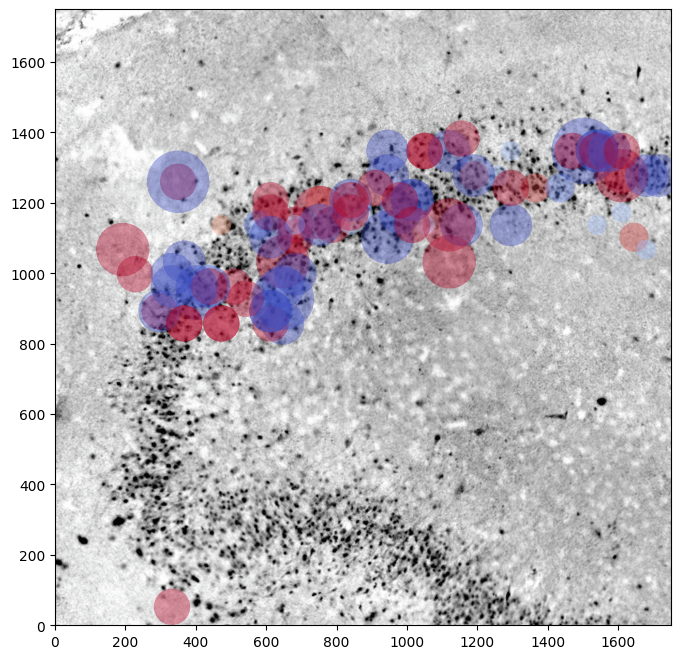

In [60]:
plot_diff(sd, firings_diff_1)

/tmp/ipykernel_5018/1104008495.py:27: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


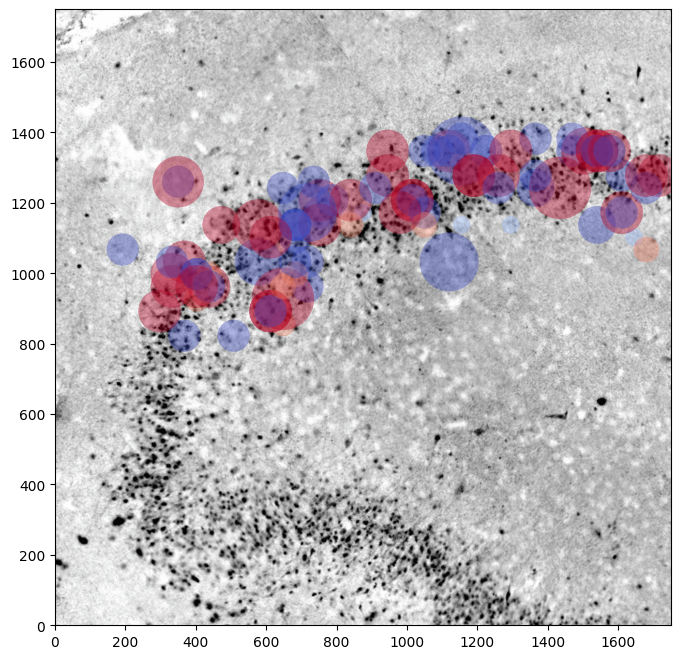

In [61]:
plot_diff(sd, firings_diff_2)